In [265]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv

In [266]:
# Load the image
image = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)  
assert image is not None

# Convert the image to grayscale for blob detection
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)


In [267]:
# Function to apply NLoG filter
def NLoG_filter(image, sigma, hw):
    # Create a Gaussian kernel
    x = np.linspace(-hw, hw, 2 * hw + 1)
    y = np.linspace(-hw, hw, 2 * hw + 1)
    X, Y = np.meshgrid(x, y)
    G = (1 / (2 * np.pi * sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))

    # Convert the Gaussian kernel to float32
    G = G.astype(np.float32)

    # Apply Sobel to compute the first derivative (gradient) of the Gaussian kernel
    Gx = cv.Sobel(G, cv.CV_32F, 1, 0, ksize=3)  # First derivative in x-direction
    Gy = cv.Sobel(G, cv.CV_32F, 0, 1, ksize=3)  # First derivative in y-direction

    # Apply Sobel to compute the second derivative 
    Gxx = cv.Sobel(Gx, cv.CV_32F, 1, 0, ksize=3)   # Second derivative in x-direction
    Gyy = cv.Sobel(Gy, cv.CV_32F, 0, 1, ksize=3)   # Second derivative in y-direction

    # Laplacian of Gaussian
    LoG = Gxx + Gyy

    # Normalized Laplacian of Gaussian
    NLoG = LoG * (sigma**2)

    # Apply the normalized Laplacian of Gaussian to the image
    img = cv.filter2D(image, cv.CV_32F, NLoG)
    return img

In [268]:
def detect_blobs(image, sigma_values, hw):

    # Create a list to store the scale space
    scale_space = []
    
    # Apply NLoG for each sigma
    for sigma in sigma_values:
        im1 = NLoG_filter(image, sigma, hw) 

        scale_space.append(im1)  # Store the result for this scale

    # Difference of Gaussians
    DoG = []
    for i in range(1, len(scale_space)):
        DoG.append(scale_space[i] - scale_space[i - 1])

    # Create a list to store the blobs
    blob_centers = []

    # Iterate over the scale space
    for i in range(1, len(DoG) - 1):
        current_image = DoG[i]
        previous_image = DoG[i - 1]
        next_image = DoG[i + 1]

        # Iterate over 3x3 neighborhood
        for y in range(1, current_image.shape[0] - 1): # Height
            for x in range(1, current_image.shape[1] - 1): # Width

                pixel_value = current_image[y, x]

                # Check whether the greater than the threshold
                if pixel_value > 200:
                    neighborhood = np.array([
                        previous_image[y - 1:y + 2, x - 1:x + 2],
                        current_image[y - 1:y + 2, x - 1:x + 2],
                        next_image[y - 1:y + 2, x - 1:x + 2]
                    ])
                    
                    # Check if the pixel is the maximum within the 3x3x3 neighborhood
                    if pixel_value == np.max(neighborhood):
                        # Store the blob center
                        blob_centers.append((x, y, sigma_values[i]*np.sqrt(2)))
    return blob_centers



In [269]:
sigma_values = np.linspace(5, 20, 15)
hw = 40

# Detect blobs
blob_centers = detect_blobs(image, sigma_values, hw)

In [270]:
blob_centers

[(119, 99, 8.586296628693791),
 (110, 100, 8.586296628693791),
 (92, 107, 8.586296628693791),
 (81, 128, 8.586296628693791),
 (335, 162, 8.586296628693791),
 (257, 164, 8.586296628693791),
 (165, 187, 8.586296628693791),
 (144, 219, 8.586296628693791),
 (160, 233, 8.586296628693791),
 (179, 246, 8.586296628693791),
 (93, 248, 8.586296628693791),
 (267, 248, 8.586296628693791),
 (118, 250, 8.586296628693791),
 (189, 253, 8.586296628693791),
 (340, 253, 8.586296628693791),
 (167, 254, 8.586296628693791),
 (207, 265, 8.586296628693791),
 (306, 266, 8.586296628693791),
 (185, 272, 8.586296628693791),
 (71, 275, 8.586296628693791),
 (294, 280, 8.586296628693791),
 (14, 285, 8.586296628693791),
 (311, 287, 8.586296628693791),
 (261, 297, 8.586296628693791),
 (98, 300, 8.586296628693791),
 (282, 300, 8.586296628693791),
 (250, 311, 8.586296628693791),
 (205, 312, 8.586296628693791),
 (177, 313, 8.586296628693791),
 (268, 348, 8.586296628693791),
 (134, 81, 10.101525445522107),
 (312, 161, 10.

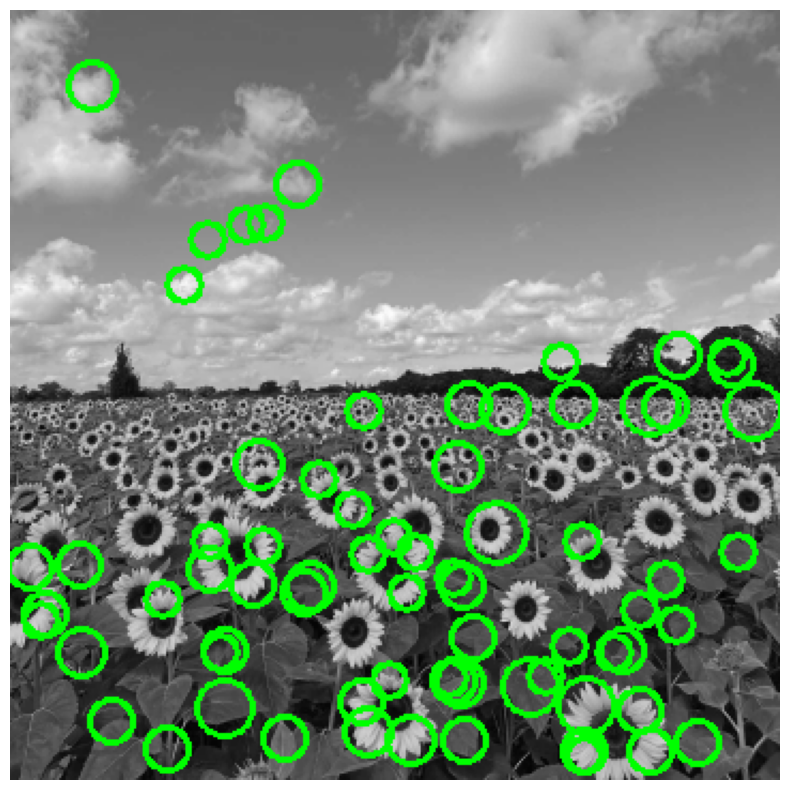

In [271]:
# Draw the original image and image with detected blobs
image_with_blobs = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

for blob in blob_centers:
    x, y, r = blob
    cv.circle(image_with_blobs, (x, y), int(r), (0, 255, 0),2)

# Display the image with detected blobs
plt.figure(figsize=(10, 10))
plt.imshow(image_with_blobs)
plt.axis('off')
plt.show()

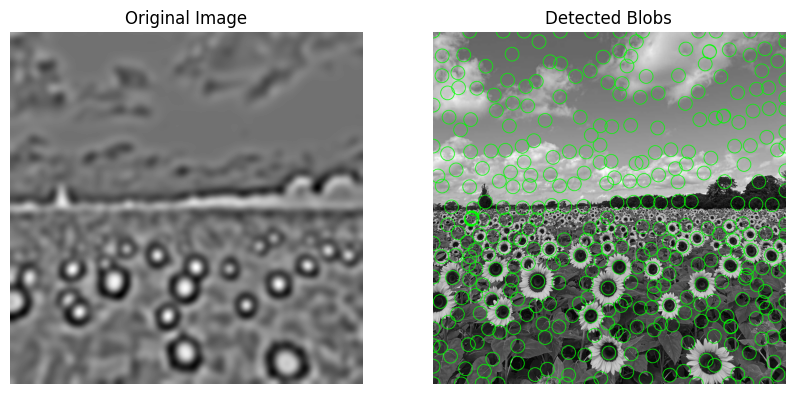

In [273]:
# Let's create a code for blob detection using the Normalized Laplacian of Gaussian (LoG) method

# Load the image
image = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_GRAYSCALE)

# Create a Gaussian kernel
sigma = 20
hw = 100
x = np.linspace(-hw, hw, 2 * hw + 1)
y = np.linspace(-hw, hw, 2 * hw + 1)
X, Y = np.meshgrid(x, y)
G = (1 / (2 * np.pi * sigma**2)) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Convert the Gaussian kernel to float32
G = G.astype(np.float32)

# Apply Sobel to compute the first derivative (gradient) of the Gaussian kernel
Gx = cv.Sobel(G, cv.CV_32F, 1, 0, ksize=3)  # First derivative in x-direction
Gy = cv.Sobel(G, cv.CV_32F, 0, 1, ksize=3)  # First derivative in y-direction

# Apply Sobel to compute the second derivative 
Gxx = cv.Sobel(Gx, cv.CV_32F, 1, 0, ksize=3)   # Second derivative in x-direction
Gyy = cv.Sobel(Gy, cv.CV_32F, 0, 1, ksize=3)   # Second derivative in y-direction

# Laplacian of Gaussian
LoG = Gxx + Gyy

# Normalized Laplacian of Gaussian
NLoG = LoG * (sigma**2)

# Apply the normalized Laplacian of Gaussian to the image
im2 = cv.filter2D(image, cv.CV_32F, NLoG)

# Find locations of maximum values in the im2 image stored in the 'maxima' array
maxima = cv.dilate(im2, np.ones((3, 3), np.uint8)) == im2

# Create a copy of the original image
im3 = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

# Draw circles around the detected blobs. (Radius = sigma*sqrt(2))
for i in range(maxima.shape[0]):
    for j in range(maxima.shape[1]):
        if maxima[i, j]:
            cv.circle(im3, (j, i), int(sigma*np.sqrt(2)), (0, 255, 0), 2)

# Display the images
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.imshow(im2, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')

ax2 = fig.add_subplot(122)
ax2.imshow(im3)
ax2.set_title('Detected Blobs')
ax2.axis('off')

plt.show()